In [5]:
# Imports pour l'analyse de modèles de reconnaissance d'image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuration des options d'affichage pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)




In [16]:
models_folder = "models/robot"

filter_str = "" 

model_folder = [f.name for f in Path(models_folder).iterdir() if f.is_dir() and filter_str in f.name]
metrics_folder  = "metrics"
#csv files in each metric folder
csv_files = ["best_epoch.csv", "train_accuracy.csv", "train_loss.csv", "val_accuracy.csv", "val_loss.csv"]


In [17]:
best_epochs = {}

for model in model_folder:
    model_path = Path(models_folder) / Path(model) / metrics_folder / "best_epoch.csv"
    if model_path.exists():
        df = pd.read_csv(model_path)
        best_epochs[model] = pd.read_csv(model_path, header=None).iloc[0, 0]
    else:
        print(f"File not found: {model_path}")

print(best_epochs)

{'efficientnet_b0_b16_lr0.1_e30': np.int64(29), 'efficientnet_b0_b16_lr0.01_e30': np.int64(29), 'efficientnet_b0_b16_lr0.001_e30': np.int64(29), 'efficientnet_b0_b16_lr0.0001_e30': np.int64(29), 'efficientnet_b0_b32_lr0.1_e30': np.int64(29), 'efficientnet_b0_b32_lr0.01_e30': np.int64(29), 'efficientnet_b0_b32_lr0.001_e30': np.int64(29), 'efficientnet_b0_b32_lr0.0001_e30': np.int64(29), 'efficientnet_b0_b64_lr0.1_e30': np.int64(29), 'efficientnet_b0_b64_lr0.01_e30': np.int64(29), 'efficientnet_b0_b64_lr0.001_e30': np.int64(29), 'efficientnet_b0_b64_lr0.0001_e30': np.int64(29), 'mobilenet_v2_b16_lr0.1_e30': np.int64(29), 'mobilenet_v2_b16_lr0.01_e30': np.int64(29), 'mobilenet_v2_b16_lr0.001_e30': np.int64(29), 'mobilenet_v2_b16_lr0.0001_e30': np.int64(29), 'mobilenet_v2_b32_lr0.1_e30': np.int64(29), 'mobilenet_v2_b32_lr0.01_e30': np.int64(29), 'mobilenet_v2_b32_lr0.001_e30': np.int64(29), 'mobilenet_v2_b32_lr0.0001_e30': np.int64(29), 'mobilenet_v2_b64_lr0.1_e30': np.int64(29), 'mobilene

In [18]:
# Récupérer les métriques à la meilleure epoch pour chaque modèle
model_metrics = {}

for model in model_folder:
    model_metrics[model] = {}
    
    # Vérifier si on a une meilleure epoch pour ce modèle
    if model not in best_epochs:
        print(f"No best epoch found for {model}")
        continue
    
    best_epoch = best_epochs[model]
    
    # Parcourir chaque fichier de métrique
    for csv_file in csv_files:
        if csv_file == "best_epoch.csv":
            continue
            
        metric_path = Path(models_folder) / Path(model) / metrics_folder / f"{csv_file}"
        
        if metric_path.exists():
            # Lire le CSV (chaque ligne = une epoch)
            metric_df = pd.read_csv(metric_path, header=None)
            
            # Récupérer la valeur à la meilleure epoch
            if best_epoch < len(metric_df):
                metric_name = csv_file.replace('.csv', '')
                model_metrics[model][metric_name] = metric_df.iloc[best_epoch, 0]
            else:
                print(f"Best epoch {best_epoch} out of range for {model}/{csv_file}")
        else:
            print(f"File not found: {metric_path}")

# Créer un DataFrame récapitulatif
results_df = pd.DataFrame(model_metrics).T
print(results_df)

                                     train_accuracy  train_loss  val_accuracy  \
efficientnet_b0_b16_lr0.1_e30               68.8119      0.5518       60.4651   
efficientnet_b0_b16_lr0.01_e30              89.3564      0.2700       88.3721   
efficientnet_b0_b16_lr0.001_e30             90.0990      0.2139       87.2093   
efficientnet_b0_b16_lr0.0001_e30            82.4257      0.4541       74.4186   
efficientnet_b0_b32_lr0.1_e30               81.6832      0.4425       79.0698   
efficientnet_b0_b32_lr0.01_e30              94.5545      0.1438       89.5349   
efficientnet_b0_b32_lr0.001_e30             91.5842      0.2477       90.6977   
efficientnet_b0_b32_lr0.0001_e30            78.7129      0.5277       67.4419   
efficientnet_b0_b64_lr0.1_e30               84.4059      0.3617       88.3721   
efficientnet_b0_b64_lr0.01_e30              93.8119      0.1423       89.5349   
efficientnet_b0_b64_lr0.001_e30             86.8812      0.3307       86.0465   
efficientnet_b0_b64_lr0.0001

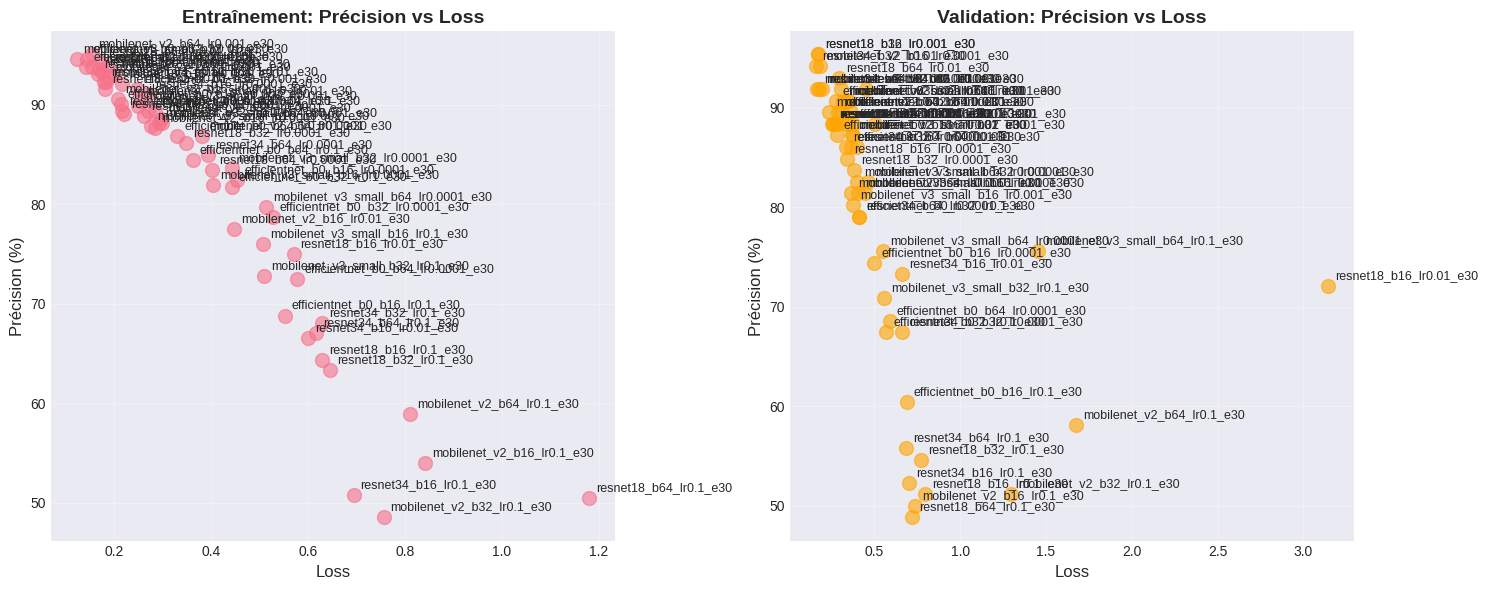

In [32]:
# Créer deux subplots pour l'entraînement et la validation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot pour l'entraînement
ax1.scatter(results_df['train_loss'], results_df['train_accuracy'], s=100, alpha=0.6)
for model_name in results_df.index:
    if pd.notna(results_df.loc[model_name, 'train_loss']):
        ax1.annotate(model_name, 
                    (results_df.loc[model_name, 'train_loss'], 
                     results_df.loc[model_name, 'train_accuracy']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
ax1.set_xlabel('Loss', fontsize=12)
ax1.set_ylabel('Précision (%)', fontsize=12)
ax1.set_title('Entraînement: Précision vs Loss', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot pour la validation
ax2.scatter(results_df['val_loss'], results_df['val_accuracy'], s=100, alpha=0.6, color='orange')
for model_name in results_df.index:
    if pd.notna(results_df.loc[model_name, 'val_loss']):
        ax2.annotate(model_name, 
                    (results_df.loc[model_name, 'val_loss'], 
                     results_df.loc[model_name, 'val_accuracy']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
ax2.set_xlabel('Loss', fontsize=12)
ax2.set_ylabel('Précision (%)', fontsize=12)
ax2.set_title('Validation: Précision vs Loss', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

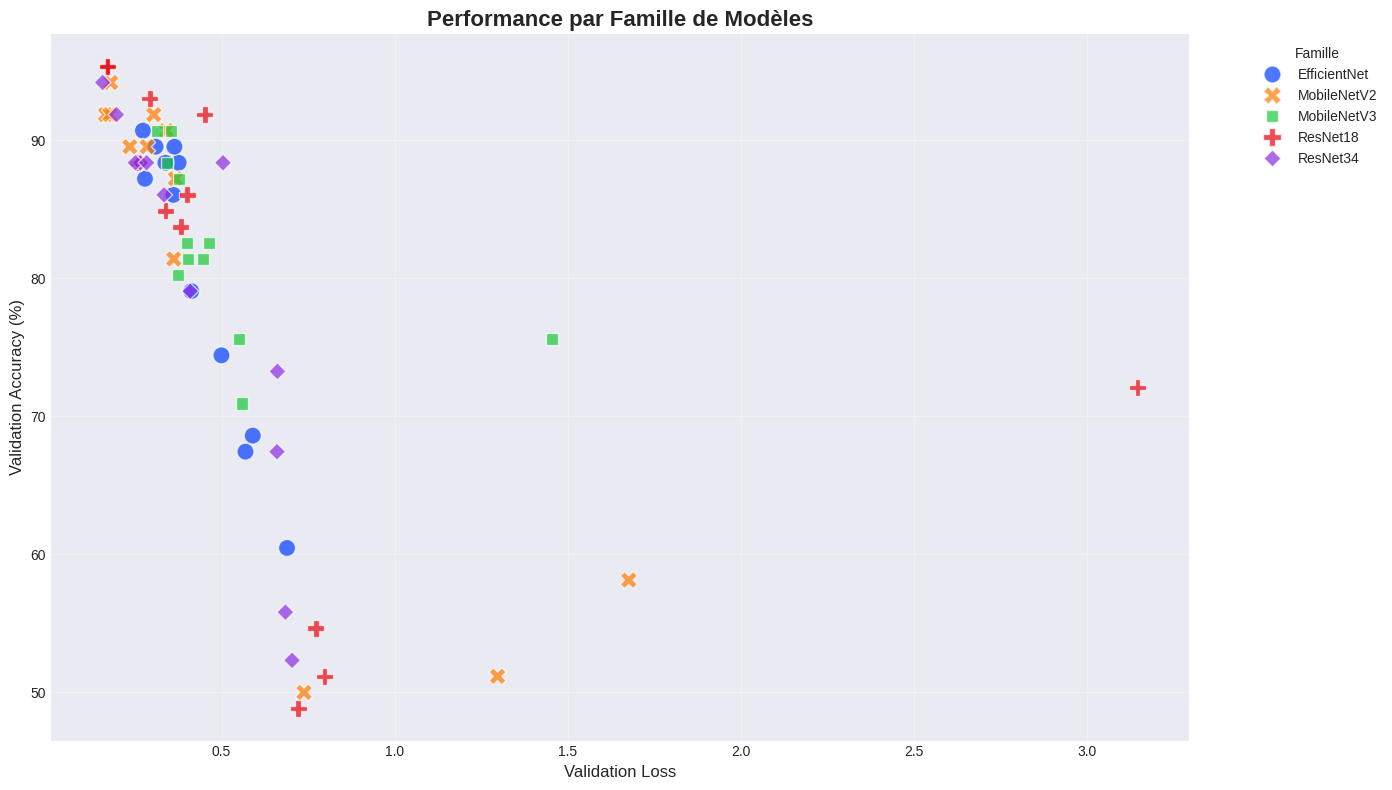

In [53]:
# ...existing code...
plt.figure(figsize=(14, 8))

# 1. Créer une colonne 'Category' basée sur le nom du modèle (l'index)
def get_category(model_name):
    model_name = model_name.lower()
    if 'resnet18' in model_name: return 'ResNet18'
    if 'resnet34' in model_name: return 'ResNet34'
    if 'mobilenet_v2' in model_name: return 'MobileNetV2'
    if 'mobilenet_v3' in model_name: return 'MobileNetV3'
    if 'efficientnet' in model_name: return 'EfficientNet'

# On travaille sur une copie pour ne pas modifier l'original
plot_df = results_df.copy()
plot_df['Category'] = plot_df.index.map(get_category)

# 2. Créer le graphique
sns.scatterplot(
    data=plot_df,
    x='val_loss', 
    y='val_accuracy', 
    hue='Category',     # On colorie maintenant par CATÉGORIE, pas par modèle individuel
    style='Category',   # Optionnel : change aussi la forme du point (rond, croix, carré...)
    s=150,              
    palette='bright',   
    alpha=0.7
)

# 3. Annoter chaque point avec le nom complet du modèle (optionnel mais utile)
# for model_name in plot_df.index:
#     if pd.notna(plot_df.loc[model_name, 'val_loss']):
#         plt.annotate(model_name, 
#                     (plot_df.loc[model_name, 'val_loss'], 
#                      plot_df.loc[model_name, 'val_accuracy']),
#                     xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)

plt.xlabel('Validation Loss', fontsize=12)
plt.ylabel('Validation Accuracy (%)', fontsize=12)
plt.title('Performance par Famille de Modèles', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Famille")

plt.tight_layout()
plt.show()

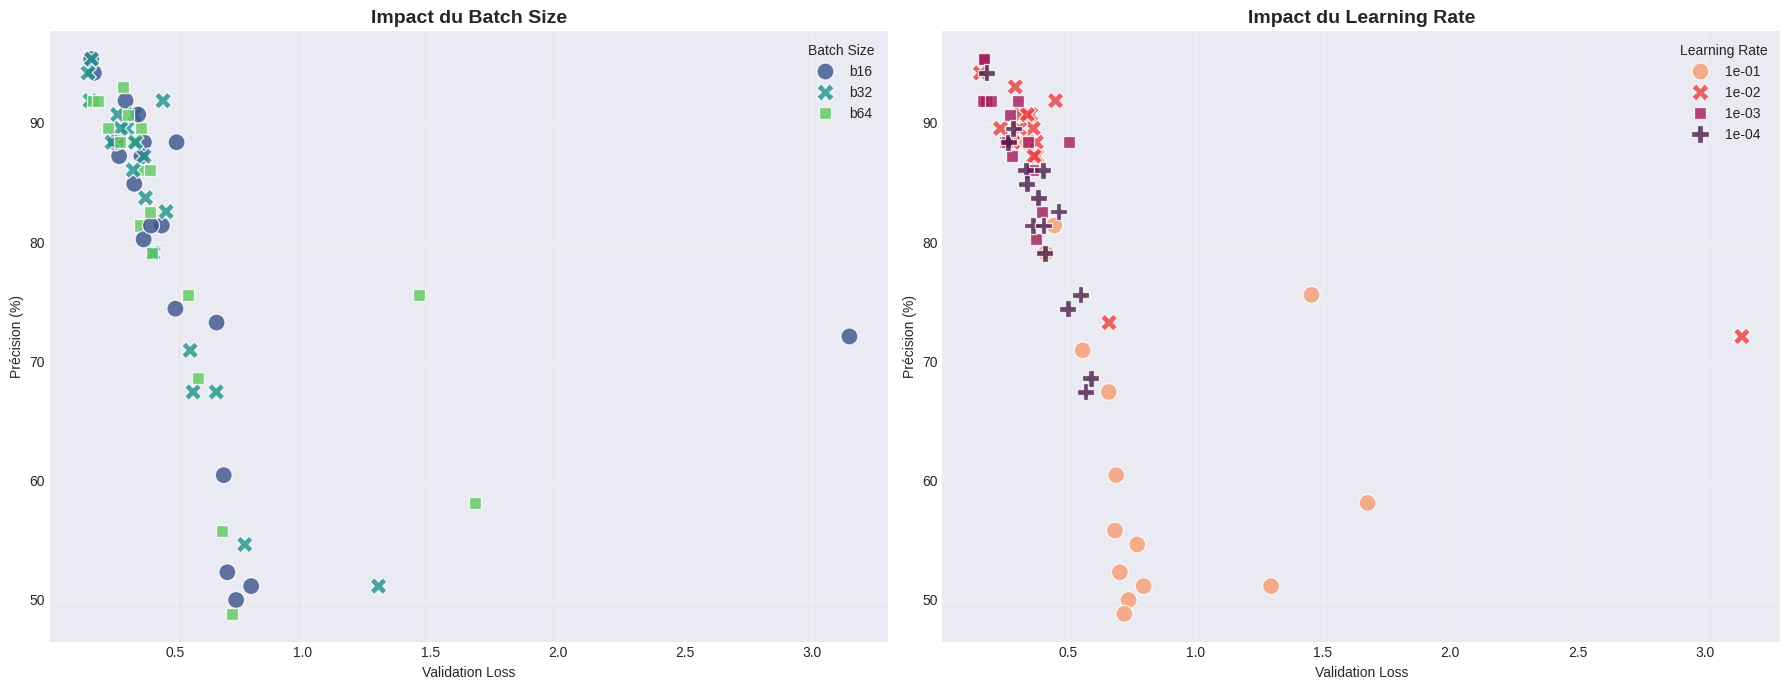

In [67]:
# ...existing code...
import re

# 1. Fonction d'extraction (réutilisée et simplifiée pour l'usage général)
def extract_params(model_name):
    name_lower = model_name.lower()
    
    # --- BATCH SIZE ---
    # Cherche '_b32', '-b32', ' b32', ou juste 'b32' si pas 'efficientnet_b0'
    batch_match = re.search(r'[_ -]b(\d+)', name_lower)
    if not batch_match:
        # Fallback moins strict, mais on filtre le 0
        batch_match = re.search(r'b(\d+)', name_lower)
    
    batch_size = 'Inconnu'
    if batch_match:
        bs = int(batch_match.group(1))
        if bs > 0: batch_size = f"b{bs}" # On stocke en string "b32" pour que ce soit une catégorie
        else:
             # Cas efficientnet_b0, on cherche plus loin
             sub_match = re.findall(r'b(\d+)', name_lower)
             for m in sub_match:
                 if int(m) > 0: 
                     batch_size = f"b{m}"
                     break

    # --- LEARNING RATE ---
    lr_match = re.search(r'lr([0-9.e-]+)', name_lower)
    lr_val = 'Inconnu'
    if lr_match:
        raw_lr = lr_match.group(1).rstrip('_')
        # Normalisation automatique (convertir '1e-3' et '0.001' en float pour qu'ils soient égaux)
        try:
            float_lr = float(raw_lr)
            lr_val = f"{float_lr:.0e}" # Format scientifique propre (ex: 1e-03)
        except:
            lr_val = raw_lr

    return pd.Series([batch_size, lr_val], index=['BatchSize', 'LearningRate'])

# Préparation des données
plot_df = results_df.copy()
params_df = plot_df.index.to_series().apply(extract_params)
plot_df = pd.concat([plot_df, params_df], axis=1)

# --- CRÉATION DES DEUX GRAPHIQUES ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))


zoom_df = plot_df[
    (plot_df['val_accuracy'] > 90) & 
    (plot_df['val_loss'] <= 0.5)
].copy()

# Graphique 1 : Variations selon la BATCH SIZE
sns.scatterplot(
    data=plot_df,
    x='val_loss', 
    y='val_accuracy', 
    hue='BatchSize',    # Couleur = Batch Size
    style='BatchSize',  # Forme = Batch Size aussi (pour mieux distinguer)
    s=150,              
    palette='viridis',   
    alpha=0.8,
    ax=ax1
)


ax1.set_title('Impact du Batch Size', fontsize=14, fontweight='bold')
ax1.set_xlabel('Validation Loss')
ax1.set_ylabel('Précision (%)')
ax1.legend(title="Batch Size")
ax1.grid(True, alpha=0.3)

# Graphique 2 : Variations selon le LEARNING RATE
# On trie les LR pour que la légende soit ordonnée logiquement
plot_df = plot_df.sort_values('LearningRate') 

sns.scatterplot(
    data=plot_df,
    x='val_loss', 
    y='val_accuracy', 
    hue='LearningRate',   # Couleur = LR
    style='LearningRate', # Forme = LR
    s=150,              
    palette='rocket_r',    # Palette différente pour bien distinguer (rocket/magma sont bien pour des intensités)
    alpha=0.8,
    ax=ax2
)
ax2.set_title('Impact du Learning Rate', fontsize=14, fontweight='bold')
ax2.set_xlabel('Validation Loss')
ax2.set_ylabel('Précision (%)')
ax2.legend(title="Learning Rate")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

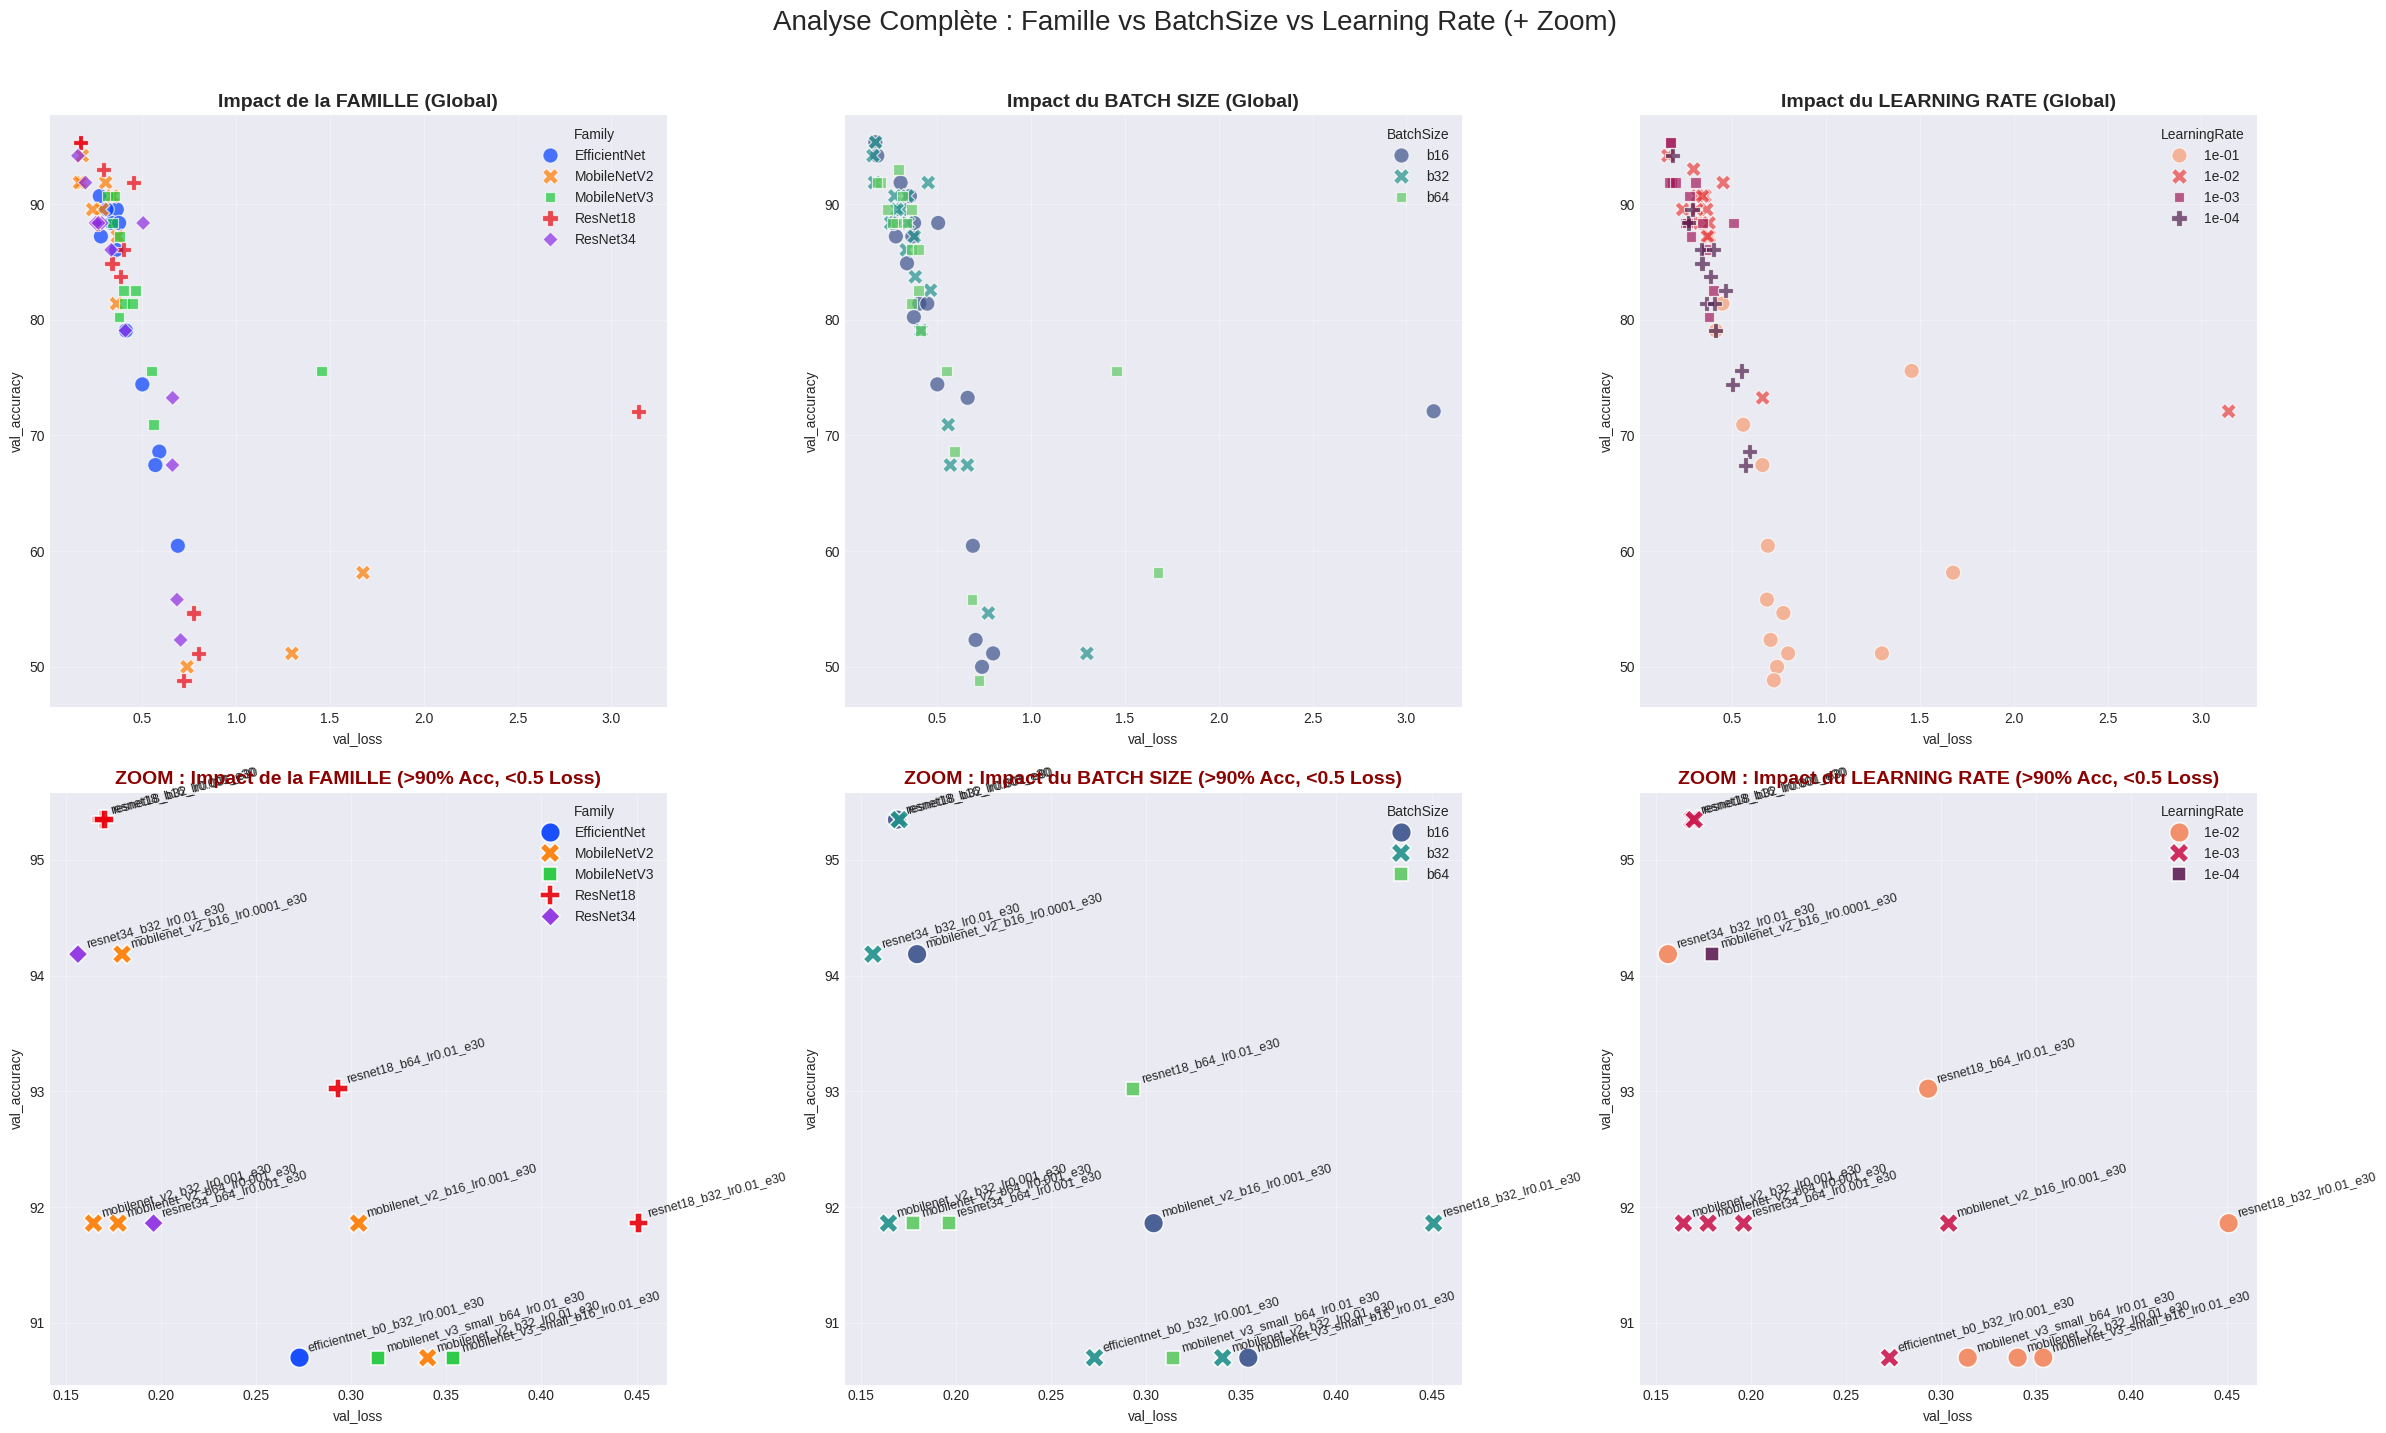

In [ ]:
import re

# 1. Fonction robuste pour extraire toutes les métadonnées
def extract_all_params(model_name):
    name_lower = model_name.lower()
    
    # --- FAMILLE ---
    family = 'Autre'
    if 'resnet18' in name_lower: family = 'ResNet18'
    elif 'resnet34' in name_lower: family = 'ResNet34'
    elif 'mobilenet_v2' in name_lower: family = 'MobileNetV2'
    elif 'mobilenet_v3' in name_lower: family = 'MobileNetV3'
    elif 'efficientnet' in name_lower: family = 'EfficientNet'

    # --- BATCH SIZE ---
    batch_match = re.search(r'[_ -]b(\d+)', name_lower)
    if not batch_match: batch_match = re.search(r'b(\d+)', name_lower)
    
    batch_size = 'Inconnu'
    if batch_match:
        bs = int(batch_match.group(1))
        if bs > 0: batch_size = f"b{bs}"
        else:
             # Cas efficientnet_b0
             sub_match = re.findall(r'b(\d+)', name_lower)
             for m in sub_match:
                 if int(m) > 0: 
                     batch_size = f"b{m}"; break

    # --- LEARNING RATE ---
    lr_match = re.search(r'lr([0-9.e-]+)', name_lower)
    lr_val = 'Inconnu'
    if lr_match:
        raw_lr = lr_match.group(1).rstrip('_')
        try:
            float_lr = float(raw_lr)
            lr_val = f"{float_lr:.0e}" # Normalisation (1e-03)
        except:
            lr_val = raw_lr

    return pd.Series([family, batch_size, lr_val], index=['Family', 'BatchSize', 'LearningRate'])

# 2. Préparation des données
# On repart de results_df brut
full_df = results_df.copy()
meta_data = full_df.index.to_series().apply(extract_all_params)
full_df = pd.concat([full_df, meta_data], axis=1)

# Création du dataset Zoomé
zoom_df = full_df[
    (full_df['val_accuracy'] > 90) & 
    (full_df['val_loss'] <= 0.5)
].copy()

# 3. Configuration de la figure (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(24, 14))

# Définition des paramètres pour chaque colonne
plot_configs = [
    {'col': 'Family',       'title': 'Impact de la FAMILLE',      'palette': 'bright'},
    {'col': 'BatchSize',    'title': 'Impact du BATCH SIZE',      'palette': 'viridis'},
    {'col': 'LearningRate', 'title': 'Impact du LEARNING RATE',   'palette': 'rocket_r'}
]

# --- BOUCLE DE CRÉATION DES GRAPHIQUES ---
for i, config in enumerate(plot_configs):
    col_name = config['col']
    
    # Trier les données pour que la légende soit propre
    current_full = full_df.sort_values(col_name)
    current_zoom = zoom_df.sort_values(col_name)

    # --- LIGNE 1 : VUE D'ENSEMBLE ---
    ax_top = axes[0, i]
    sns.scatterplot(
        data=current_full, x='val_loss', y='val_accuracy',
        hue=col_name, style=col_name,
        s=120, alpha=0.7, palette=config['palette'], ax=ax_top
    )
    ax_top.set_title(f"{config['title']} (Global)", fontsize=14, fontweight='bold')
    ax_top.grid(True, alpha=0.3)
    ax_top.legend(title=col_name)

    # --- LIGNE 2 : ZOOM ---
    ax_bot = axes[1, i]
    if len(current_zoom) > 0:
        sns.scatterplot(
            data=current_zoom, x='val_loss', y='val_accuracy',
            hue=col_name, style=col_name,
            s=200, alpha=0.9, palette=config['palette'], ax=ax_bot
        )
        # Annotations seulement sur le zoom
        # for model_name in current_zoom.index:
        #     ax_bot.annotate(
        #         model_name, 
        #         (current_zoom.loc[model_name, 'val_loss'], current_zoom.loc[model_name, 'val_accuracy']),
        #         xytext=(5, 5), textcoords='offset points', fontsize=9, rotation=15
        #     )
    
    ax_bot.set_title(f"ZOOM : {config['title']} (>90% Acc, <0.5 Loss)", fontsize=14, fontweight='bold', color='darkred')
    ax_bot.grid(True, alpha=0.3)
    ax_bot.legend(title=col_name)

# Titre global et ajustements
plt.suptitle("Analyse Complète : Famille vs BatchSize vs Learning Rate (+ Zoom)", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


In [46]:
best_models = results_df.sort_values(
    by=['val_accuracy', 'val_loss'], 
    ascending=[False, True],
    kind="mergesort"
)

best_models = best_models.drop(columns=['train_accuracy', 'train_loss'])

# print(best_models)

bests_10 = best_models.head(10)

print(best_models.head(10))



                               val_accuracy  val_loss
resnet18_b32_lr0.001_e30            95.3488    0.1703
resnet18_b16_lr0.001_e30            95.3488    0.1691
resnet34_b32_lr0.01_e30             94.1860    0.1565
mobilenet_v2_b16_lr0.0001_e30       94.1860    0.1797
resnet18_b64_lr0.01_e30             93.0233    0.2932
resnet34_b64_lr0.001_e30            91.8605    0.1962
mobilenet_v2_b32_lr0.001_e30        91.8605    0.1646
resnet18_b32_lr0.01_e30             91.8605    0.4511
mobilenet_v2_b64_lr0.001_e30        91.8605    0.1776
mobilenet_v2_b16_lr0.001_e30        91.8605    0.3039


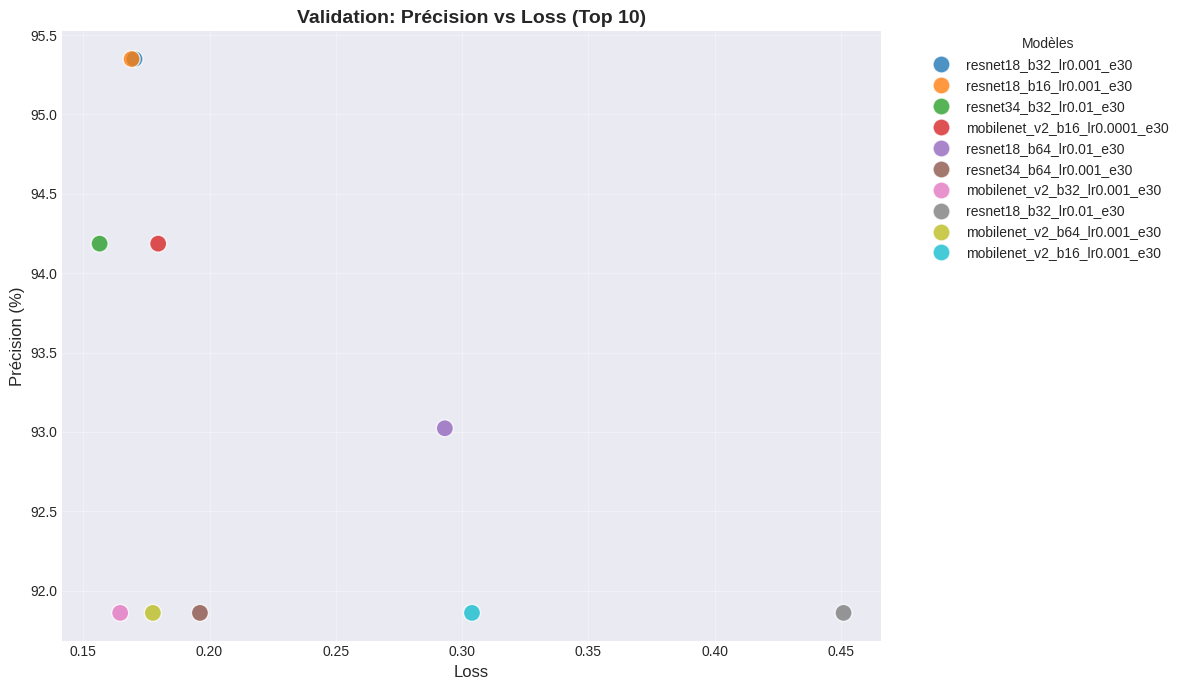

In [51]:
plt.figure(figsize=(12, 7))

# Utilisation de Seaborn pour gérer automatiquement les couleurs via 'hue'
sns.scatterplot(
    data=bests_10,
    x='val_loss', 
    y='val_accuracy', 
    hue=bests_10.index, # C'est ici qu'on définit une couleur par nom de modèle
    s=150,              # Taille des points
    palette='tab10',    # Palette de couleurs bien distinctes
    alpha=0.8
)

# for model_name in bests_10.index:
#     if pd.notna(bests_10.loc[model_name, 'val_loss']):
#         plt.annotate(model_name, 
#                     (bests_10.loc[model_name, 'val_loss'], 
#                      bests_10.loc[model_name, 'val_accuracy']),
#                     xytext=(5, 5), textcoords='offset points', fontsize=9)
                    
plt.xlabel('Loss', fontsize=12)
plt.ylabel('Précision (%)', fontsize=12)
plt.title('Validation: Précision vs Loss (Top 10)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Place la légende à l'extérieur du graphique (à droite)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title="Modèles")

plt.tight_layout()
plt.show()

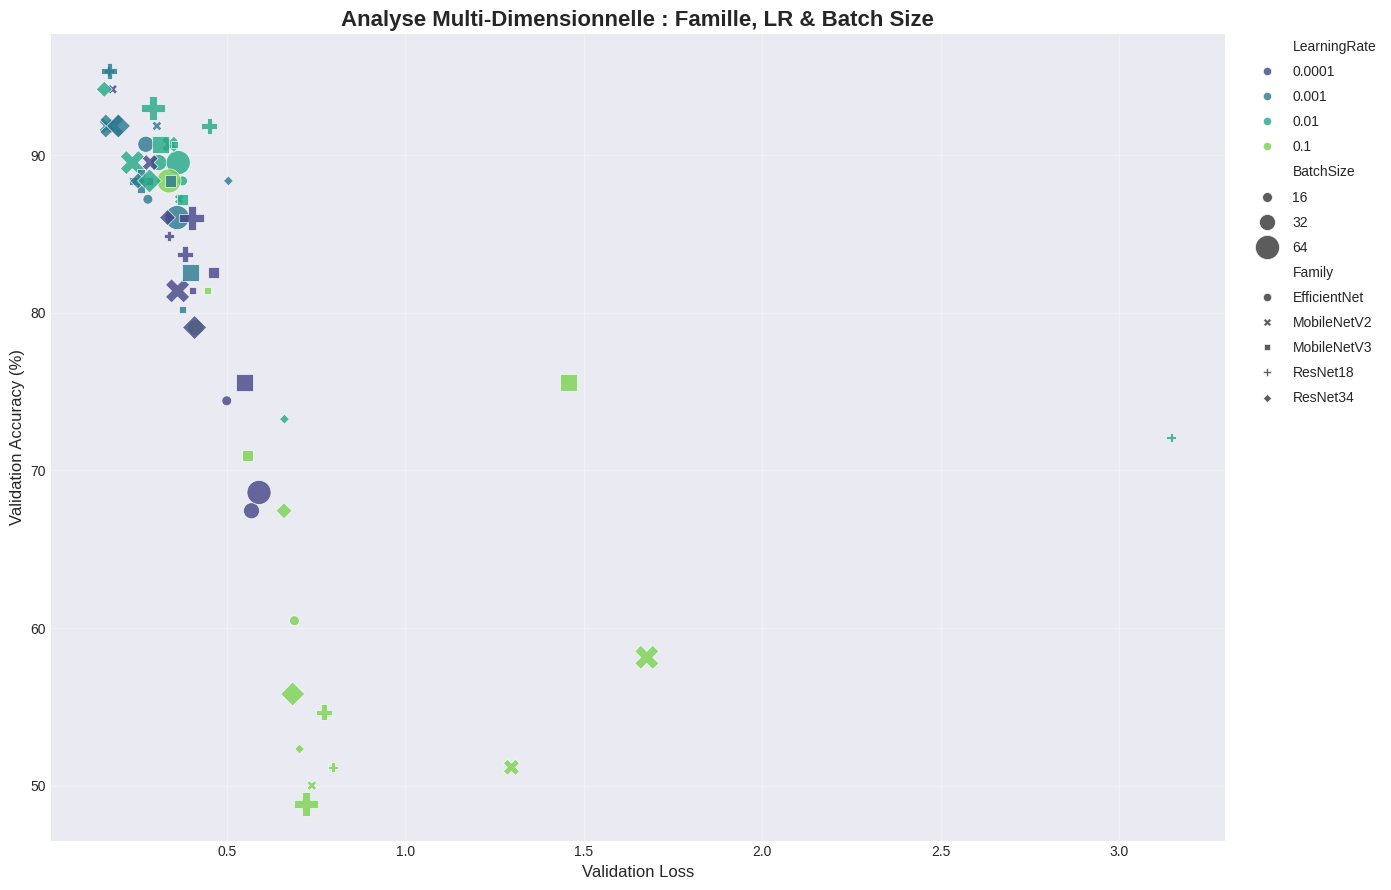

In [64]:
import re

plt.figure(figsize=(14, 9))

# 1. Fonction pour extraire les métadonnées depuis le nom du fichier
def extract_metadata(model_name):
    name_lower = model_name.lower()
    
    # --- FAMILLE (Forme) ---
    if 'resnet18' in name_lower: family = 'ResNet18'
    if 'resnet34' in name_lower: family = 'ResNet34'
    if 'mobilenet_v2' in name_lower: family = 'MobileNetV2'
    if 'mobilenet_v3' in name_lower: family = 'MobileNetV3'
    if 'efficientnet' in name_lower: family = 'EfficientNet'
    
    # --- BATCH SIZE (Taille) ---
    # Cherche 'b' suivi de chiffres (ex: b32, b64)
    # On cherche souvent _b32_ ou b32 au début/milieu
    batch_match = re.search(r'b(\d{2})', name_lower)


    # if int(batch_match.group(1)) == 0:
    #     batch_size = int(batch_match.group(2))
    # else:

    batch_size = int(batch_match.group(1))
    
    # --- LEARNING RATE (Couleur) ---
    # Cherche 'lr' suivi de chiffres, points ou 'e-' (ex: lr0.001, lr1e-4)
    lr_match = re.search(r'lr([0-9.e-]+)', name_lower)
    lr_val = lr_match.group(1) 
    
    # On nettoie parfois le LR s'il finit par un underscore
    if lr_val.endswith('_'): lr_val = lr_val[:-1]
    
    return pd.Series([family, batch_size, lr_val], index=['Family', 'BatchSize', 'LearningRate'])

# 2. Préparation des données
# On applique l'extraction sur l'index (les noms de modèles)
meta_df = results_df.index.to_series().apply(extract_metadata)
# On combine avec les résultats (loss, acc)
plot_df = pd.concat([results_df, meta_df], axis=1)

# Optionnel : Trier pour avoir une légende propre
plot_df = plot_df.sort_values(by=['Family', 'LearningRate', 'BatchSize'])

# 3. Création du graphique
sns.scatterplot(
    data=plot_df,
    x='val_loss', 
    y='val_accuracy',
    style='Family',       # FORME = Famille
    hue='LearningRate',   # COULEUR = Learning Rate
    size='BatchSize',     # TAILLE = Batch Size
    sizes=(50, 300),      # Plage de taille des points (min, max) pour que ce soit lisible
    palette='viridis',    # Palette de couleur (ou 'bright', 'deep', 'turbo')
    alpha=0.8
)

# 4. Annotations (optionnel, peut surcharger le graphe)
# for model_name in plot_df.index:
#    if pd.notna(plot_df.loc[model_name, 'val_loss']):
#        plt.annotate(model_name, (plot_df.loc[model_name, 'val_loss'], plot_df.loc[model_name, 'val_accuracy']), fontsize=6, alpha=0.5)

plt.xlabel('Validation Loss', fontsize=12)
plt.ylabel('Validation Accuracy (%)', fontsize=12)
plt.title('Analyse Multi-Dimensionnelle : Famille, LR & Batch Size', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# 5. Légende optimisée (placée à l'extérieur)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., labelspacing=0.8)

plt.tight_layout()
plt.show()